In [14]:
import pandas as pd
import numpy as np
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [15]:
s.cumsum()

0    2.0
1    NaN
2    7.0
3    6.0
4    6.0
dtype: float64

In [16]:
df = pd.DataFrame([[2.0, 1.0],
                   [3.0, np.nan],
                   [1.0, 0.0]],
                   columns=list('AB'))
df

,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [17]:
print(f'df.dtypes: {df.dtypes},type(df.dtypes): {type(df)}')
df.cumsum()


df.dtypes: A    float64
B    float64
dtype: object,type(df.dtypes): <class 'pandas.core.frame.DataFrame'>


,A,B
0,2.0,1.0
1,5.0,NaN
2,6.0,1.0


In [18]:
df.cumsum(axis=0)

,A,B
0,2.0,1.0
1,5.0,NaN
2,6.0,1.0


In [19]:
import unittest
import os
import numpy as np
import pandas as pd

from mlfinlab.data_structures import standard_data_structures as ds
#set pandas options width to 1000
pd.set_option('display.width', 1000)


In [20]:
path = "../mlfinlab/tests/test_data/tick_data.csv"
data = pd.read_csv(path)
print(f"type(data): {type(data)} \nshape: {data.shape} \ndata.dtypes: {data.dtypes}")
print(data.head(3))
data.index = pd.to_datetime(data['Date and Time'])
#print row 2~3
print(data.iloc[2:4])
data = data.drop('Date and Time', axis=1)
print(data.iloc[2:4])
print(f"dtype: {data.dtypes}")

type(data): <class 'pandas.core.frame.DataFrame'> 
shape: (100, 3) 
data.dtypes: Date and Time     object
Price            float64
Volume             int64
dtype: object
             Date and Time    Price  Volume
0  2011/07/31 22:38:45.108  1205.00       1
1  2011/07/31 22:38:45.934  1005.00       1
2  2011/07/31 22:38:47.008  1304.75       6
                                   Date and Time    Price  Volume
Date and Time                                                    
2011-07-31 22:38:47.008  2011/07/31 22:38:47.008  1304.75       6
2011-07-31 22:38:48.944  2011/07/31 22:38:48.944  1904.75       1
                           Price  Volume
Date and Time                           
2011-07-31 22:38:47.008  1304.75       6
2011-07-31 22:38:48.944  1904.75       1
dtype: Price     float64
Volume      int64
dtype: object


In [21]:
t_constant = pd.Series([100000], index=[data.index[0]])
print(f"dtype(t_constant): {t_constant.dtype} \nshape: {t_constant.shape} \nt_constant.dtypes: {t_constant.dtypes}\ntype(t_constant): {type(t_constant)}")
#print row 2~3
print(t_constant)
t_dynamic = pd.Series([10000, 20000, 50000], index=[data.index[0], data.index[40], data.index[80]])
t_low = pd.Series([1000], index=[data.index[0]])
print(t_constant)
print(t_dynamic)
print(t_low)
threshold = 100000
db1 = ds.get_dollar_bars(path, threshold=threshold, batch_size=1000, verbose=False)
db2 = ds.get_dollar_bars(path, threshold=threshold, batch_size=50, verbose=False)
db3 = ds.get_dollar_bars(path, threshold=threshold, batch_size=1, verbose=False)
print(f"db1.shape: {db1.shape}, db2.shape: {db2.shape}, db3.shape: {db3.shape}")
print(f"db1.dtypes: {db1.dtypes}, db2.dtypes: {db2.dtypes}, db3.dtypes: {db3.dtypes}")
print(f"db1.index.dtype: {db1.index.dtype}, db2.index.dtype: {db2.index.dtype}, db3.index.dtype: {db3.index.dtype}")
print(f"db1.index: {db1.index}, db2.index: {db2.index}, db3.index: {db3.index}")
print(f"db1.index[0]: {db1.index[0]}, db2.index[0]: {db2.index[0]}, db3.index[0]: {db3.index[0]}")

#check if db1 equals db2
print(f"db1.equals(db2): {db1.equals(db2)}")
#check if db1 equals db3
print(f"db1.equals(db3): {db1.equals(db3)}")
print(db1)
print(db2)
print(db3)

dtype(t_constant): int64 
shape: (1,) 
t_constant.dtypes: int64
type(t_constant): <class 'pandas.core.series.Series'>
2011-07-31 22:38:45.108    100000
dtype: int64
2011-07-31 22:38:45.108    100000
dtype: int64
2011-07-31 22:38:45.108    10000
2011-07-31 22:39:59.606    20000
2011-07-31 22:40:29.478    50000
dtype: int64
2011-07-31 22:38:45.108    1000
dtype: int64
db1.shape: (3, 10), db2.shape: (3, 10), db3.shape: (3, 10)
db1.dtypes: date_time           datetime64[ns]
tick_num                     int64
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
cum_buy_volume               int64
cum_ticks                    int64
cum_dollar_value           float64
dtype: object, db2.dtypes: date_time           datetime64[ns]
tick_num                     int64
open                       float64
high                       float64
low                        float64
close   

In [22]:
data = pd.read_csv(path)
print(f"type(data): {type(data)} \nshape: {data.shape} \ndata.dtypes: {data.dtypes}")
print(data.head(3))
# data.index = pd.to_datetime(data['Date and Time'])
data['Date and Time'] = pd.to_datetime(data['Date and Time'])
#print row 2~3
print(data.iloc[2:4])

db1 = ds.get_dollar_bars(data, threshold=threshold, batch_size=1000, verbose=False)
print(db1)
print(db2)

#check if db1 equals db2
print(f"db1.equals(db2): {db1.equals(db2)}")

type(data): <class 'pandas.core.frame.DataFrame'> 
shape: (100, 3) 
data.dtypes: Date and Time     object
Price            float64
Volume             int64
dtype: object
             Date and Time    Price  Volume
0  2011/07/31 22:38:45.108  1205.00       1
1  2011/07/31 22:38:45.934  1005.00       1
2  2011/07/31 22:38:47.008  1304.75       6
            Date and Time    Price  Volume
2 2011-07-31 22:38:47.008  1304.75       6
3 2011-07-31 22:38:48.944  1904.75       1
                date_time  tick_num    open     high     low    close  volume  cum_buy_volume  cum_ticks  cum_dollar_value
0 2011-07-31 22:39:28.965        24  1205.0  1904.75  1005.0  1304.50      82               7         24         107178.25
1 2011-07-31 22:40:16.182        61  1304.5  1305.00  1304.5  1305.00      79              29         37         103065.00
2 2011-07-31 22:40:44.921        98  1305.0  3305.00   205.0  1305.25      77              52         37         100394.25
                date_time  tick_n

                                      date_time  tick_num     open     high     low    close  volume  cum_buy_volume  cum_ticks  cum_dollar_value
date_time                                                                                                                                        
2011-07-31 22:38:52.951 2011-07-31 22:38:52.951         6  1205.00  1904.75  1005.0  1304.75      30               7          6          39343.00
2011-07-31 22:39:26.743 2011-07-31 22:39:26.743        19  1304.75  1304.75  1304.5  1304.50      34               0         13          44354.25
2011-07-31 22:39:51.519 2011-07-31 22:39:51.519        33  1304.50  1304.75  1304.5  1304.50      30               1         14          39135.25
2011-07-31 22:40:10.794 2011-07-31 22:40:10.794        46  1304.50  1304.75  1304.5  1304.75      35               6         13          45659.00
2011-07-31 22:40:16.182 2011-07-31 22:40:16.182        61  1304.50  1305.00  1304.5  1305.00      32              22        

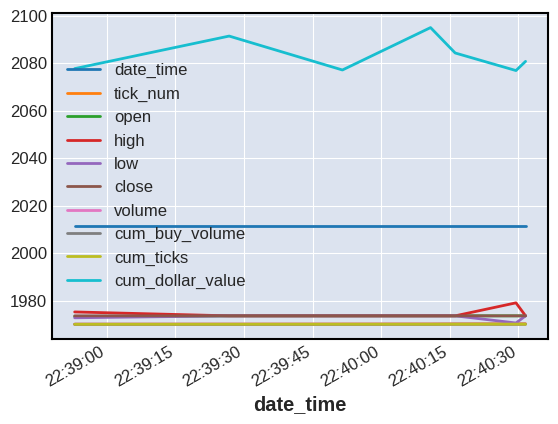

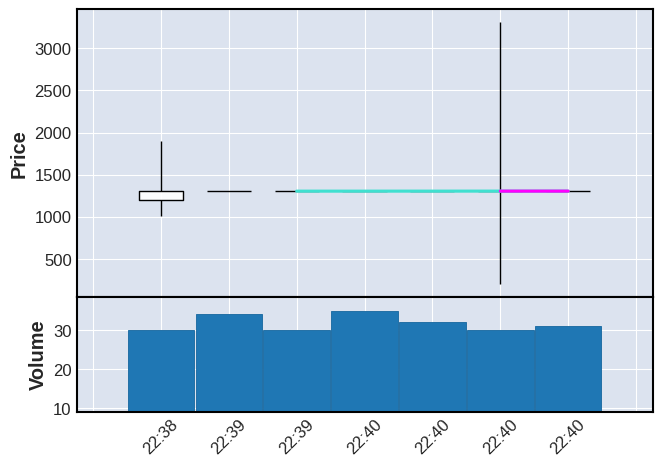

In [23]:
threshold = 30
db1 = ds.get_volume_bars(data, threshold=threshold, batch_size=1000, verbose=False)
db1.index = pd.to_datetime(db1['date_time'])
print(db1)
#plot db1,x-axis is datetime
db1.plot()
#plot with mplfinance
import mplfinance as mpf
mpf.plot(db1,type='candle',mav=(3,6,9),volume=True)



In [27]:
def binance_spot_trade_csv_loader(file_path,nrows=None):
    # no header in the csv file
    df = pd.read_csv(
        file_path,
        nrows=nrows,
        header=None,
        names=[
            "trade_id",
            "price",
            "volume",
            "quote_qty",
            "time_ms",
            "is_buyer_maker",
            "ignore",
        ],
    )
    # df["date"] = df["time_ms"].apply(time_ms_to_datetime)
    df["date_time"] = pd.to_datetime(df["time_ms"], unit="ms")
    #datetime to string ms
    df["date_time"] = df["date_time"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S.%f"))

    #df["is_buyer_maker"] = df["is_buyer_maker"].apply(lambda x: 1 if x == "True" else 0)
    #df["ignore"] = df["ignore"].apply(lambda x: 1 if x == "True" else 0)
    # drop the time_ms column
    df.drop("time_ms", axis=1, inplace=True)
    #only keep date_time,price,volume,is_buyer_maker
    df = df[["date_time", "price", "volume", "is_buyer_maker"]]
    #set index to date
    #df.set_index("date_time", inplace=True)
    #set column 0 is date_time,1 is price,2 is volume,3 is_buyer_maker
    
    return df
    
#read serveral lines of file
path = "~/Desktop/database/exchange_history/binance/spot/btcbusd/trade/BTCBUSD-trades-2023-01.csv.done"
n = 2000
#read n lines of csv file,column names are given [time_ms,price,qty,quote_qty,trade_id,is_buyer_maker,ignore]
df = binance_spot_trade_csv_loader(path,nrows=n)
print(df)       


                       date_time     price   volume  is_buyer_maker
0     2023-01-01 00:00:00.029000  16534.83  0.00587           False
1     2023-01-01 00:00:00.308000  16534.59  0.02078            True
2     2023-01-01 00:00:00.340000  16534.60  0.00100           False
3     2023-01-01 00:00:00.419000  16534.59  0.01534           False
4     2023-01-01 00:00:00.429000  16534.59  0.00885           False
...                          ...       ...      ...             ...
1995  2023-01-01 00:01:06.177000  16535.86  0.00617            True
1996  2023-01-01 00:01:06.177000  16535.86  0.00617            True
1997  2023-01-01 00:01:06.177000  16535.86  0.00617            True
1998  2023-01-01 00:01:06.177000  16535.85  0.02288            True
1999  2023-01-01 00:01:06.177000  16535.84  0.00150            True

[2000 rows x 4 columns]


date
2023-01-01 00:00:00.029     0.00587
2023-01-01 00:00:00.308     0.02665
2023-01-01 00:00:00.340     0.02765
2023-01-01 00:00:00.419     0.04299
2023-01-01 00:00:00.429     0.05184
                             ...   
2023-01-01 00:01:06.177    58.46319
2023-01-01 00:01:06.177    58.46936
2023-01-01 00:01:06.177    58.47553
2023-01-01 00:01:06.177    58.49841
2023-01-01 00:01:06.177    58.49991
Name: volume, Length: 2000, dtype: float64


,date_time,price,volume,is_buyer_maker
date,,,,
2023-01-01 00:00:00.029,2023-01-01 00:00:00.029000,16534.83,0.00587,False
2023-01-01 00:00:00.308,2023-01-01 00:00:00.308000,16534.59,0.02078,True
2023-01-01 00:00:00.340,2023-01-01 00:00:00.340000,16534.60,0.00100,False
2023-01-01 00:00:00.419,2023-01-01 00:00:00.419000,16534.59,0.01534,False
2023-01-01 00:00:00.429,2023-01-01 00:00:00.429000,16534.59,0.00885,False
...,...,...,...,...
2023-01-01 00:01:06.177,2023-01-01 00:01:06.177000,16535.86,0.00617,True
2023-01-01 00:01:06.177,2023-01-01 00:01:06.177000,16535.86,0.00617,True
2023-01-01 00:01:06.177,2023-01-01 00:01:06.177000,16535.86,0.00617,True


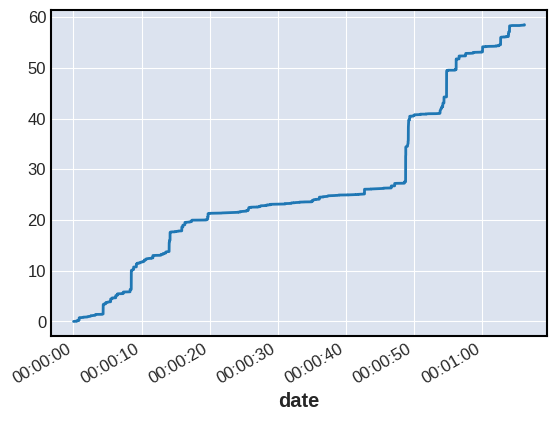

In [34]:
#print volume cumsum
print(df["volume"].cumsum())
#x-axis is datetime
df["date"] = pd.to_datetime(df["date_time"])
df.set_index("date", inplace=True)
df["volume"].cumsum().plot()
df

                                          date_time  tick_num      open      high       low     close    volume  cum_buy_volume  cum_ticks  cum_dollar_value
date_time                                                                                                                                                   
2023-01-01 00:00:48.737  2023-01-01 00:00:48.737000      1399  16534.83  16535.26  16531.34  16535.26  30.07951        15.20177       1399      497311.89094


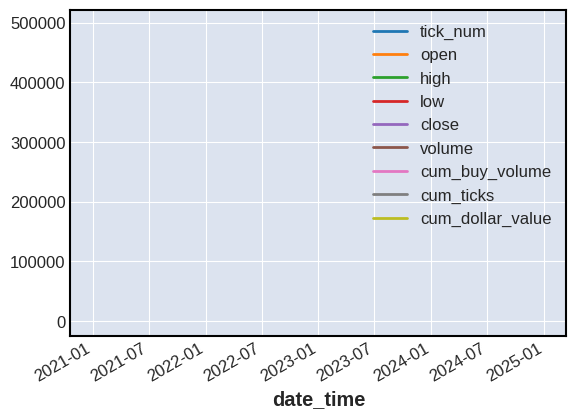

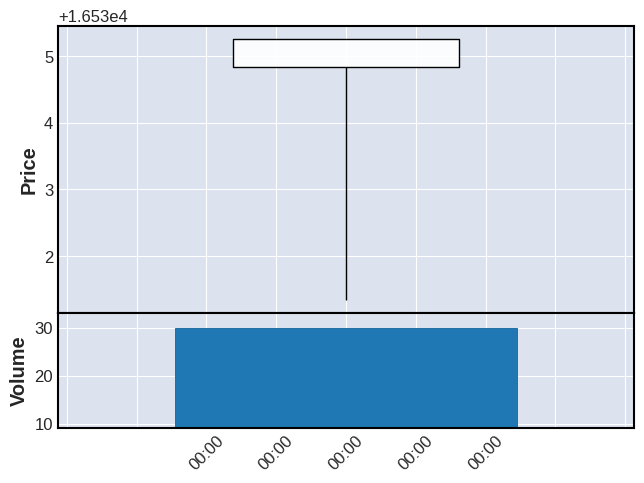

In [35]:
threshold = 10
db1 = ds.get_volume_bars(df, threshold=threshold, batch_size=1000, verbose=False)
db1.index = pd.to_datetime(db1['date_time'])
print(db1)
#plot db1,x-axis is datetime
db1.plot()
#plot with mplfinance
import mplfinance as mpf
mpf.plot(db1,type='candle',mav=(3,6,9),volume=True)